# Assignment 3: Credit-scoring model
## CS 533: Intro to Data Science
Kevin Kirchoff<br>
Taso Kinnas

## 1. Import and explore the data

### a) Load relevant libraries

In [4]:
library(plyr)
library(tidyverse)
library(dplyr)
library(tidyr)
library(modelr)
library(reshape2)
library(MASS)

In [5]:
# sets plot height to 3.5 inches
options(repr.plot.height=3.5)

### b) Load Data
* Named columns

In [6]:
credit_raw = read_delim("data/creditdata/german.data.txt", delim=" ",
                        col_names=c("Current_balance",
                                    "Duration_in_month",
                                    "Credit_history",
                                    "Purpose",
                                    "Credit_amount",
                                    "Savings_account_bonds",
                                    "Present_employment_since",
                                    "income_debt_ratio",
                                    "Personal_status_sex",
                                    "Other_debtors",
                                    "Present_residence_since",
                                    "Property",
                                    "Age",
                                    "Other_installment_plans",
                                    "Housing",
                                    "Number_credits_at_this_bank",
                                    "Job",
                                    "Dependents",
                                    "Telephone",
                                    "foreign_worker",
                                    "outcome"))
# head(credit_raw)

Parsed with column specification:
cols(
  .default = col_character(),
  Duration_in_month = col_integer(),
  Credit_amount = col_integer(),
  income_debt_ratio = col_integer(),
  Present_residence_since = col_integer(),
  Age = col_integer(),
  Number_credits_at_this_bank = col_integer(),
  Dependents = col_integer(),
  outcome = col_integer()
)
See spec(...) for full column specifications.


### c) Convert to logical, factored, and transform as needed
* Renamed data to be more meaningful for intrepretation
* Converted outcome to logical
* Performed logistical regression on some continuous data for more meainful graphs
* Converted categorical data to factors
* Re-ordered dataframe to group similar data types (continuous, ordinal, etc.)

In [7]:
credit_raw$Current_balance = revalue(credit_raw$Current_balance,
                                    c("A11" = "0 DM",
                                      "A12" = "0 <= 200 DM",
                                      "A13" = "200 DM or more",
                                      "A14" = "no checking account"))
credit_raw$Credit_history = revalue(credit_raw$Credit_history,
                                   c("A30" = "no credits taken/all credits paid back duly",
                                     "A31" = "all credits at this bank paid back duly",
                                     "A32" = "existing credits paid back duly till now",
                                     "A33" = "delay in paying off in the past",
                                     "A34" = "critical/credits at other banks"))
credit_raw$Purpose = revalue(credit_raw$Purpose,                                      
                            c("A40" = "car(new)",
                              "A41" = "car(used)",
                              "A42" = "furniture/equipment",
                              "A43" = "radio/television",
                              "A44" = "domestic appliances",
                              "A45" = "repairs",
                              "A46" = "education",
                              "A47" = "vacation",
                              "A48" = "retraining",
                              "A49" = "business",
                              "A410" = "others"))
credit_raw$Savings_account_bonds = revalue(credit_raw$Savings_account_bonds,
                                          c("A61" = "0 <= 100 DM",
                                            "A62" = "100 <= 500 DM", 
                                            "A63" = "500 <= 1000 DM",
                                            "A64" = "1000 DM or more",     
                                            "A65" = "unknown/ no savings account"))
credit_raw$Present_employment_since = revalue(credit_raw$Present_employment_since,
                                          c("A71" = "unemployed",
                                            "A72" = " 0 <= 1 year",
                                            "A73" = "1 <= 4 years",  
                                            "A74" = "4 <= 7 years",
                                            "A75" = "7 or more years"))
credit_raw$Personal_status_sex = revalue(credit_raw$Personal_status_sex,
                                          c("A91" = "male:divorced/separated",
                                            "A92" = "female:divorced/separated/married",
                                            "A93" = "male:single",
                                            "A94" = "male:married/widowed",
                                            "A95" = "female:single"))
credit_raw$Other_debtors = revalue(credit_raw$Other_debtors,
                                  c("A101" = "none",
                                    "A102" = "co-applicant",
                                    "A103" = "guarantor"))
credit_raw$Property = revalue(credit_raw$Property, 
                             c("A121" = "real estate",
                               "A122" = "if not A121 : building society savings agreement/life insurance",
                               "A123" = "if not A121/A122 : car or other, not in attribute 6",
                               "A124" = "unknown / no property"))
credit_raw$Other_installment_plans = revalue(credit_raw$Other_installment_plans,
                                            c("A141" = "bank",
                                              "A142" = "stores",
                                              "A143" = "none"))
credit_raw$Housing = revalue(credit_raw$Housing,
                            c("A151" = "rent",
                              "A152" = "own",
                              "A153" = "free"))
credit_raw$Job = revalue(credit_raw$Job,    
                        c("A171" = "unemployed/ unskilled  - non-resident",
                          "A172" = "unskilled - resident",                    
                          "A173" = "skilled employee / official",                         
                          "A174" = "management/ self-employed/highly qualified employee/officer"))
credit_raw$Telephone = revalue(credit_raw$Telephone,
                                        c("A191" = "none",
                                          "A192" = "yes"))
credit_raw$foreign_worker = revalue(credit_raw$foreign_worker,
                                        c("A201" = "yes",
                                          "A202" = "no"))

credit_raw = credit_raw %>% mutate(GoodRisk = outcome == 1)
#more meaningful to get logit valuues
credit_raw = credit_raw %>% mutate(logit_duration = log(Duration_in_month))

credit_raw$Current_balance = factor(credit_raw$Current_balance)
credit_raw$Credit_history = factor(credit_raw$Credit_history)
credit_raw$Purpose = factor(credit_raw$Purpose)
credit_raw$Savings_account_bonds = factor(credit_raw$Savings_account_bonds, ordered=TRUE)
credit_raw$Present_employment_since = factor(credit_raw$Present_employment_since)
credit_raw$Personal_status_sex = factor(credit_raw$Personal_status_sex)
credit_raw$Other_debtors = factor(credit_raw$Other_debtors)
credit_raw$Property = factor(credit_raw$Property)
credit_raw$Other_installment_plans = factor(credit_raw$Other_installment_plans)
credit_raw$Housing = factor(credit_raw$Housing)
credit_raw$Job = factor(credit_raw$Job)
credit_raw$Telephone = factor(credit_raw$Telephone)
credit_raw$foreign_worker = factor(credit_raw$foreign_worker)

credit_raw = dplyr::select(credit_raw, Duration_in_month, Credit_amount, income_debt_ratio, Present_residence_since,
                            Age, Number_credits_at_this_bank, Dependents ,everything())
# str(credit_raw)

The following `from` values were not present in `x`: A47
The following `from` values were not present in `x`: A95


### d) Take a 10% sample of the data
* per documentation, 1000 items of data
* set seed so test_data & train_data is always same when re-running notebook

In [8]:
set.seed(5)
test_data = sample_n(credit_raw, size= 100)
train_data = anti_join(credit_raw, test_data)
# head(train_data)

Joining, by = c("Duration_in_month", "Credit_amount", "income_debt_ratio", "Present_residence_since", "Age", "Number_credits_at_this_bank", "Dependents", "Current_balance", "Credit_history", "Purpose", "Savings_account_bonds", "Present_employment_since", "Personal_status_sex", "Other_debtors", "Property", "Other_installment_plans", "Housing", "Job", "Telephone", "foreign_worker", "outcome", "GoodRisk", "logit_duration")


### e) Exploring the Data
<p>
*Summary of Data Exploration:* We looked at the data in the context of box plots & histograms for continuous data,
bar charts for categorical data, and then variances in approval rates of the categorical.
</p>

<p>
The only box plots that showed meaningful insight were for Duration_in_month and Credit_amount.  As with the histograms, these two features showed that most people applied for credit that was short term and low amount. This supports a common sense idea that a bank would prefer to give credit under those conditions as it is 
more likely the debtor could repay the loan.  The rest of the features didn't show much in the perspective of box plots.  Additional features that we ran histograms on fit with common sense ideas to approve credit.  A high income to debt ratio, longer residency, a low number of other credits at the bank, all support ability to repay.  The age of applicants mostly falls in the range of 25 to 40 years old.  This also makes sense that people who are younger are likely earning less and could use credit to make purchases.  As someone gets older, they are likely earning more and have less of a need for credit.   
</p>
<p>
The categorical features also demonstrated reasonable expectations describing an applicant.  For example, most applicants had little or no money in checking or savings. They had no one to guarantee or cosigner on a loan.  These would be the type of people that would want to obtain credit as they don't have the cash to make the purchase they want to otherwise.  At the same time, the majority of applicants have other property or assets to support against the loan.  The fact that the majority of applicants do have this is because that other people have the belief they wouldn't get approved so never applied.  Some other takeaways from the bar charts are that good credit history, longer employment, few outstanding debts have high approval and characteristics of the applicants.  Another notable feature is that most applicants fall in the skilled employee/official category.  Again, perhaps people not in this category don't expect a loan to be approved and therefore don't apply. Some other insights from the categorical data is that most applicants appear to be purchasing personal property (cars, furniture, TVs).  The majority of applicants are also foreign.  That would be interesting to understand better why this is.  It is also odd that there are three categories for male and only one for female. 
</p>
<p>
We looked at approval rates and compared to the mean of the categories to gather more insights.  Interestingly, we saw the highest approval rate with applicants who had no checking account in the Current_balance feature (second was applicants with more than 200 DM, which makes sense).  In terms of credit history, the highest approved where applicants with credits at other banks.  This doesn't make complete sense as someone would arguably be more likely to default if they had payment obligations elsewhere.  The majority of approvals went to applicants looking to purchase used cars and TVs.  This seems logical in that those are likely low risk (short duration and amount).  Over half of the applicants were single males and that group and married males were much more likely to get approved.  This category is odd in that there are three categories for males and only one for females.  In addition, only about a quarter of applicants are female.  It seems that there is a cultural phenomenon in Germany that females don't get loans/aren't approved for loans or this data was somehow poorly sampled and a more realistic percentage of female applicants was missed.  The additional features fit with common sense risk factors.  No property and existing credit increased denials. Lastly, foreign workers had a significantly lower chance of approval relative to non-foreign workers.  At the same time, nearly all applicants were foreign.  This makes an interesting question as to why non-foreigners don't apply for credit. 
</p>



#### i. Boxplots

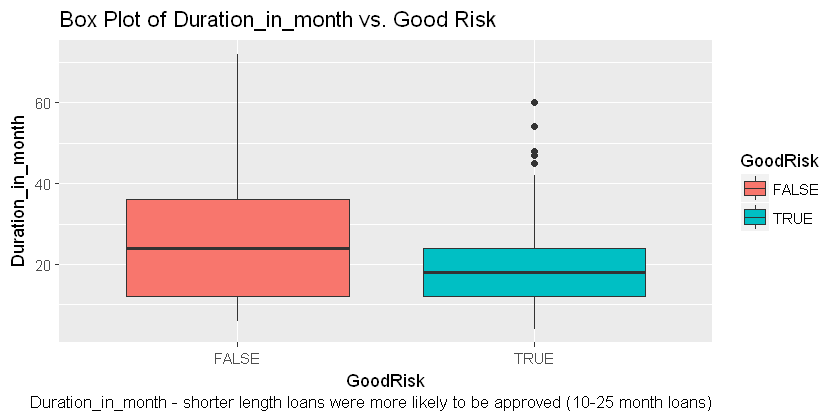

In [9]:
ggplot(train_data) +
    aes(x=GoodRisk, y=Duration_in_month, fill=GoodRisk) +
    geom_boxplot() +
    labs(title="Box Plot of Duration_in_month vs. Good Risk",
         caption = "Duration_in_month - shorter length loans were more likely to be approved (10-25 month loans)")

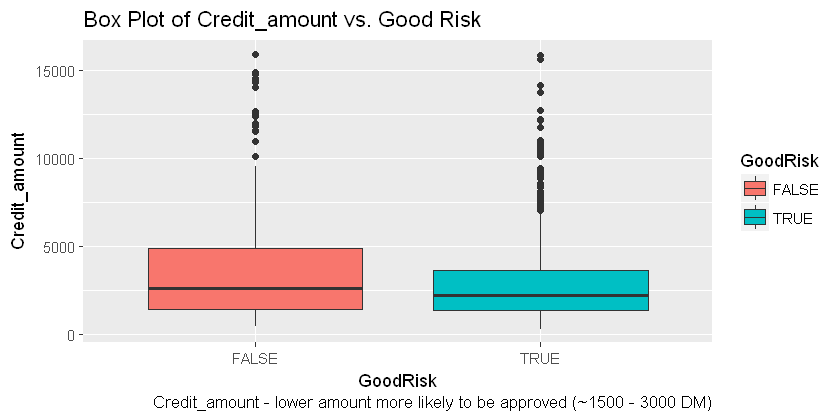

In [10]:
ggplot(train_data) +
    aes(x=GoodRisk, y=Credit_amount, fill=GoodRisk) +
    geom_boxplot() +
    labs(title="Box Plot of Credit_amount vs. Good Risk",
         caption = "Credit_amount - lower amount more likely to be approved (~1500 - 3000 DM)")

#### ii. Histograms

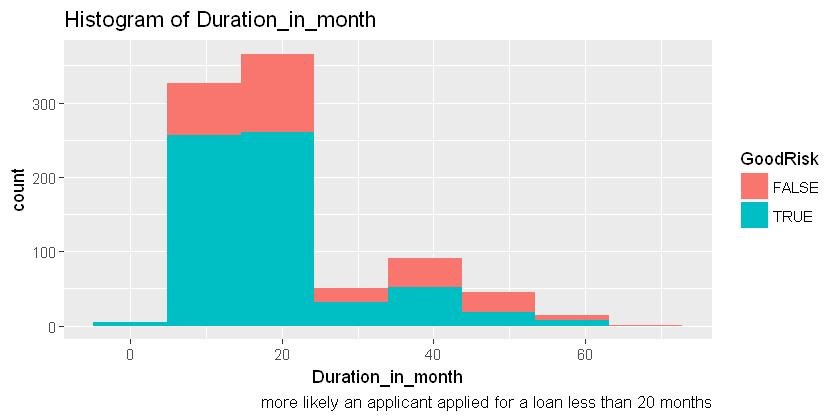

In [11]:
ggplot(train_data) +
    aes(x=Duration_in_month, fill=GoodRisk) +
    geom_histogram(bins=8) +
    labs(title="Histogram of Duration_in_month",
         caption = "more likely an applicant applied for a loan less than 20 months")

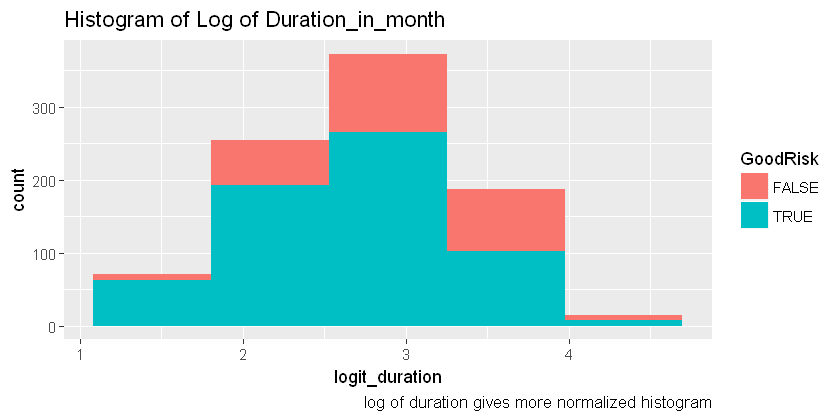

In [12]:
ggplot(train_data) +
    aes(x=logit_duration, fill=GoodRisk) +
    geom_histogram(bins=5) +
    labs(title="Histogram of Log of Duration_in_month",
         caption = "log of duration gives more normalized histogram")

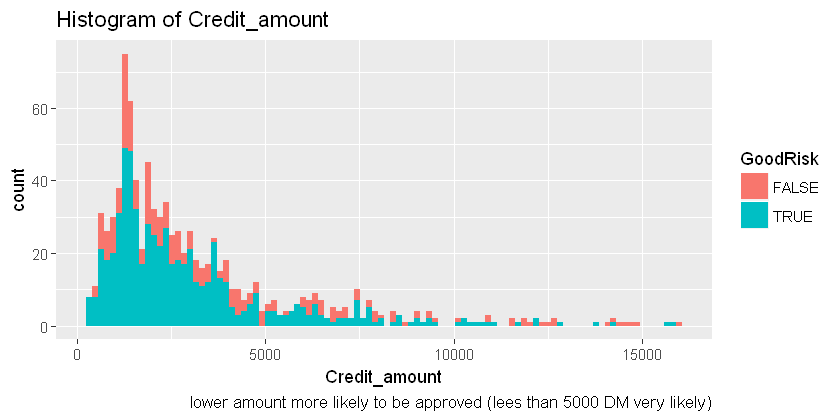

In [13]:
ggplot(train_data) +
    aes(x=Credit_amount, fill=GoodRisk) +
    geom_histogram(bins=100) +
    labs(title="Histogram of Credit_amount",
         caption = "lower amount more likely to be approved (lees than 5000 DM very likely)")

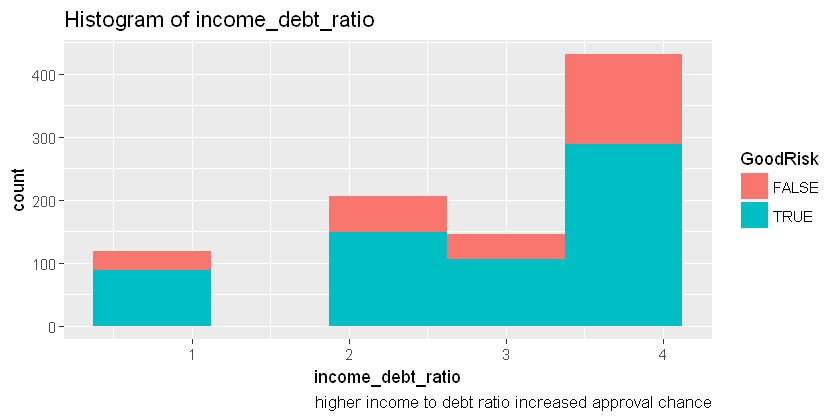

In [14]:
ggplot(train_data) +
    aes(x=income_debt_ratio, fill=GoodRisk) +
    geom_histogram(bins=5) +
    labs(title="Histogram of income_debt_ratio",
         caption = "higher income to debt ratio increased approval chance")

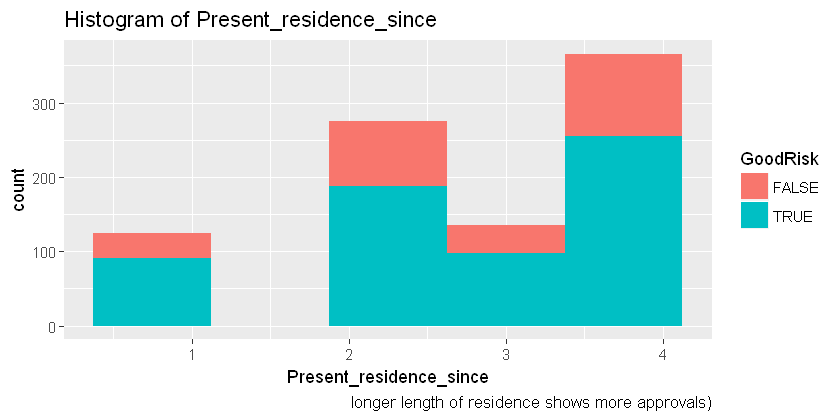

In [15]:
ggplot(train_data) +
    aes(x=Present_residence_since, fill=GoodRisk) +
    geom_histogram(bins=5) +
    labs(title="Histogram of Present_residence_since",
         caption = "longer length of residence shows more approvals)")

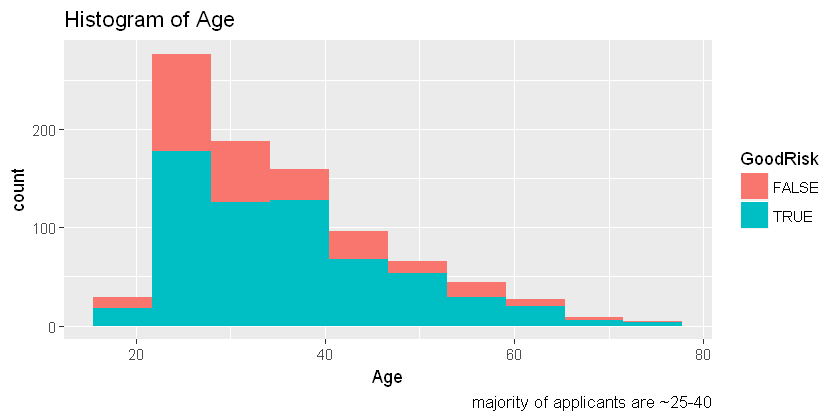

In [16]:
ggplot(train_data) +
    aes(x=Age, fill=GoodRisk) +
    geom_histogram(bins=10) +
    labs(title="Histogram of Age",
         caption = "majority of applicants are ~25-40")

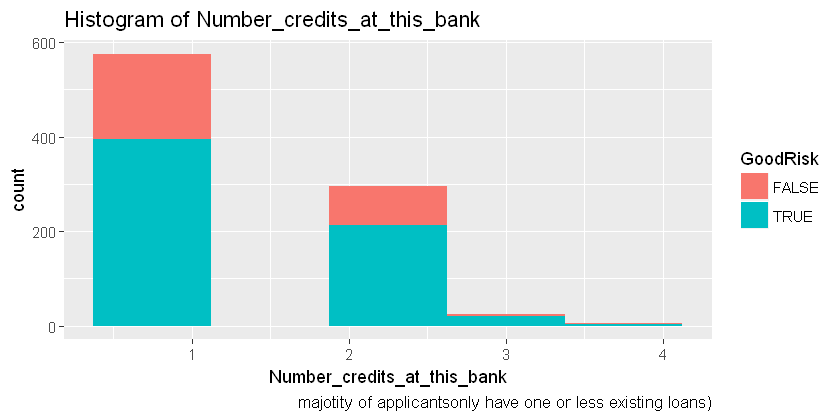

In [17]:
ggplot(train_data) +
    aes(x=Number_credits_at_this_bank, fill=GoodRisk) +
    geom_histogram(bins=5) +
    labs(title="Histogram of Number_credits_at_this_bank",
         caption = "majotity of applicantsonly have one or less existing loans)")

#### iii. Bar Charts

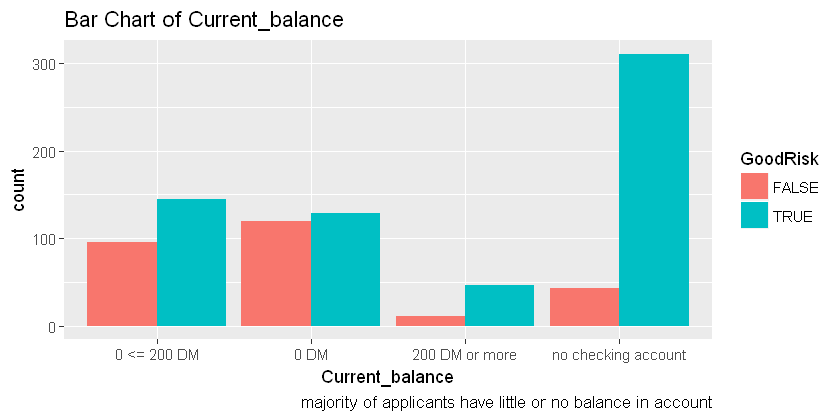

In [18]:
ggplot(train_data) +
    aes(x=Current_balance, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    labs(title="Bar Chart of Current_balance",
         caption = "majority of applicants have little or no balance in account")

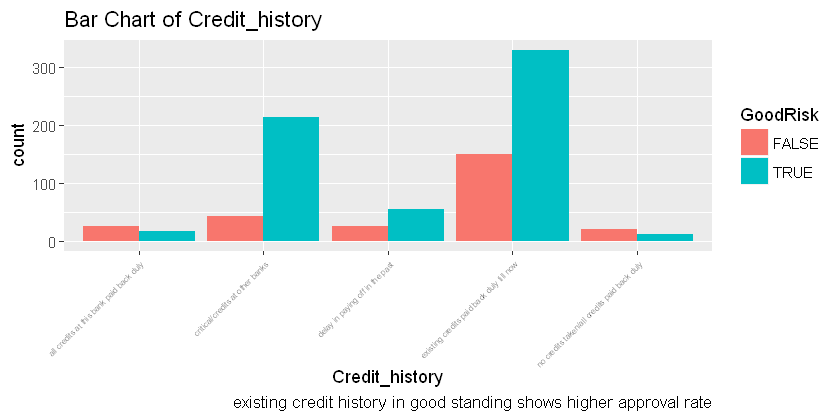

In [19]:
ggplot(train_data) +
    aes(x=Credit_history, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    theme(axis.text.x = element_text(size=5, angle=45, hjust=1)) +
    labs(title="Bar Chart of Credit_history",
         caption = "existing credit history in good standing shows higher approval rate")

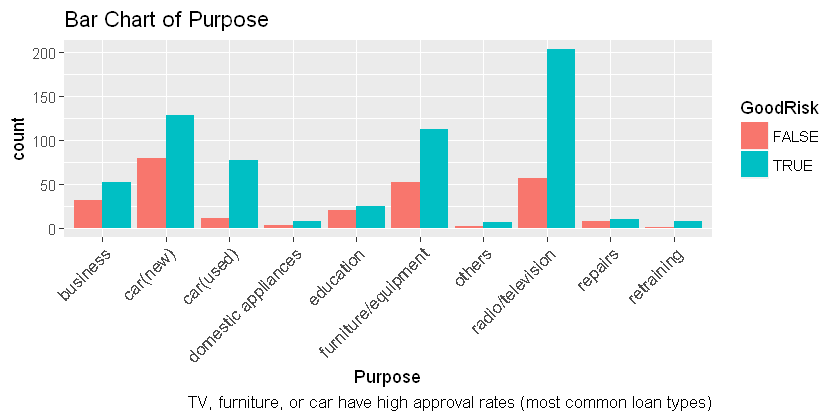

In [20]:
ggplot(train_data) +
    aes(x=Purpose, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    theme(axis.text.x = element_text(size=10, angle=45, hjust=1)) +
    labs(title="Bar Chart of Purpose",
         caption = "TV, furniture, or car have high approval rates (most common loan types)")

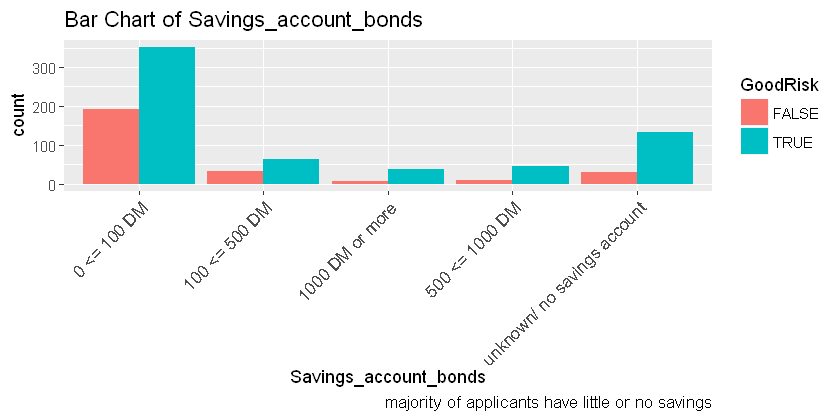

In [21]:
ggplot(train_data) +
    aes(x=Savings_account_bonds, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    theme(axis.text.x = element_text(size=10, angle=45, hjust=1)) +
    labs(title="Bar Chart of Savings_account_bonds",
         caption = "majority of applicants have little or no savings")

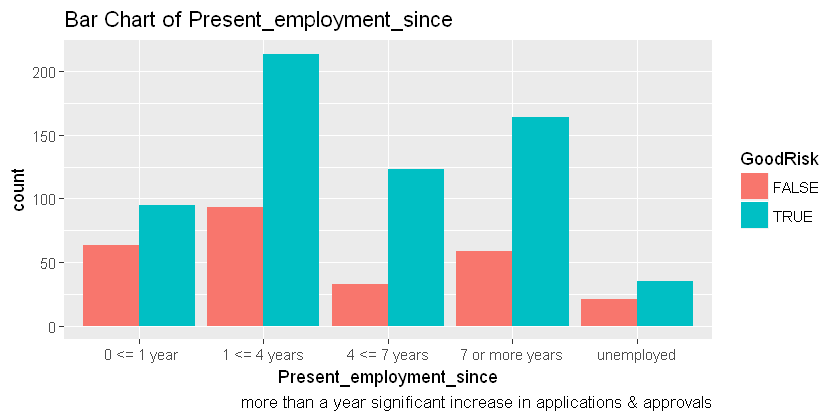

In [22]:
ggplot(train_data) +
    aes(x=Present_employment_since, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    labs(title="Bar Chart of Present_employment_since",
         caption = "more than a year significant increase in applications & approvals")

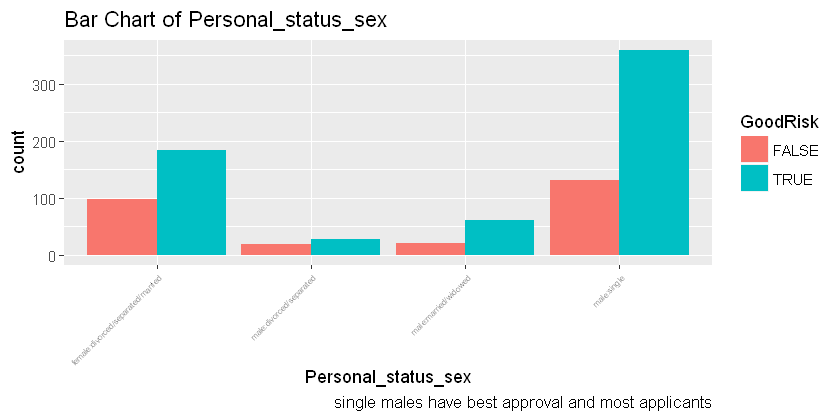

In [23]:
ggplot(train_data) +
    aes(x=Personal_status_sex, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    theme(axis.text.x = element_text(size=5, angle=45, hjust=1)) +
    labs(title="Bar Chart of Personal_status_sex",
         caption = "single males have best approval and most applicants")

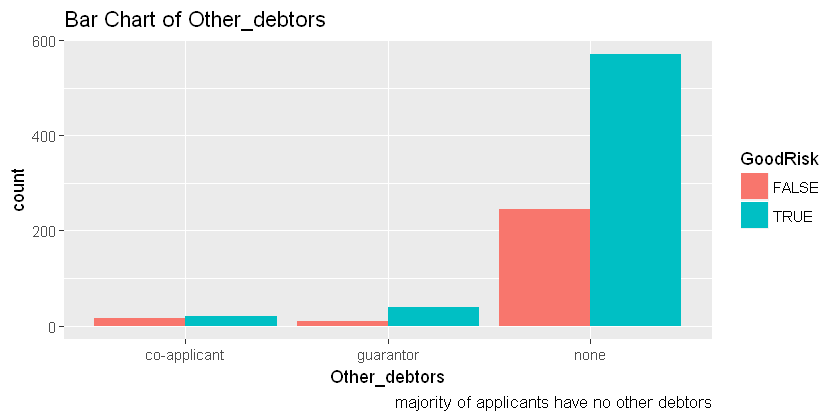

In [24]:
ggplot(train_data) +
    aes(x=Other_debtors, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    labs(title="Bar Chart of Other_debtors",
         caption = "majority of applicants have no other debtors")

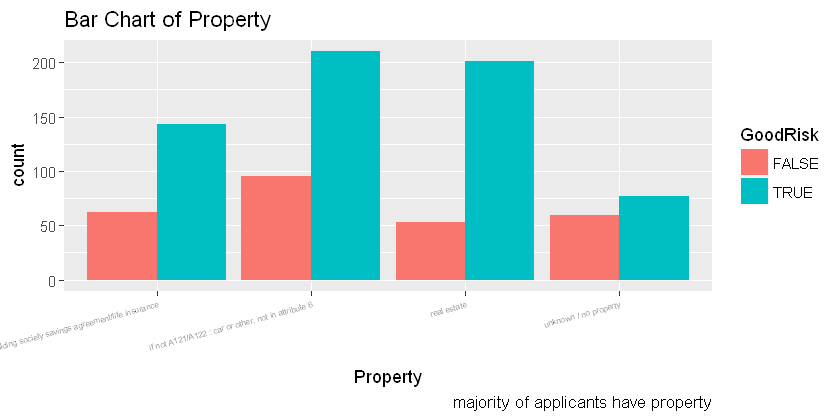

In [25]:
ggplot(train_data) +
    aes(x=Property, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    theme(axis.text.x = element_text(size=5, angle=15, hjust=1)) +
    labs(title="Bar Chart of Property",
         caption = "majority of applicants have property")

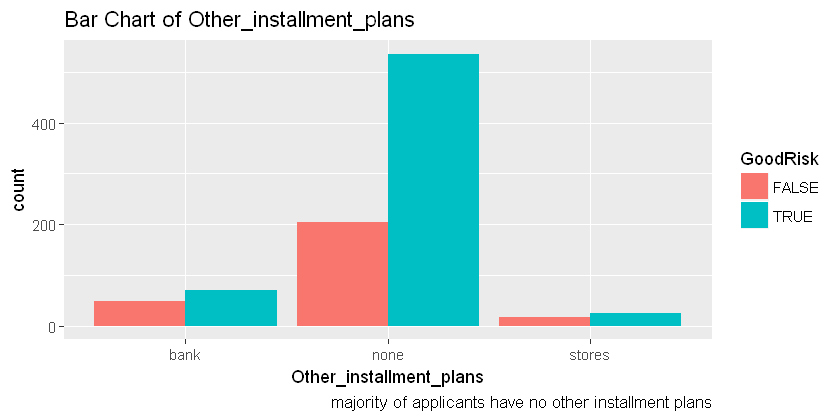

In [26]:
ggplot(train_data) +
    aes(x=Other_installment_plans, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    labs(title="Bar Chart of Other_installment_plans",
         caption = "majority of applicants have no other installment plans")

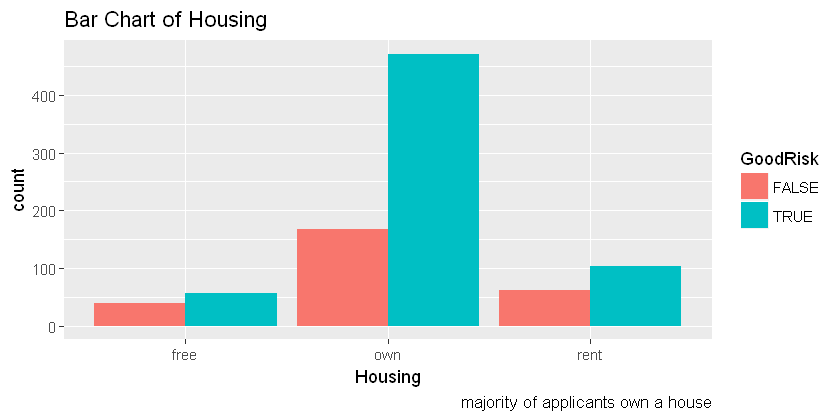

In [27]:
ggplot(train_data) +
    aes(x=Housing, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    labs(title="Bar Chart of Housing",
         caption = "majority of applicants own a house")

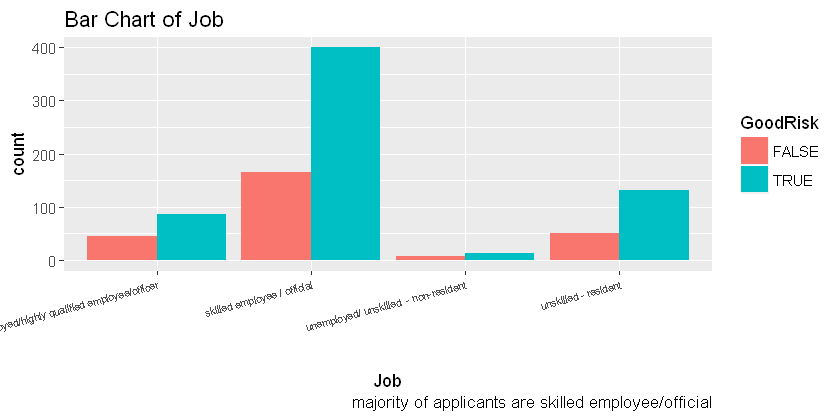

In [28]:
ggplot(train_data) +
    aes(x=Job, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    theme(axis.text.x = element_text(size=6, angle=15, hjust=1)) +
    labs(title="Bar Chart of Job",
         caption = "majority of applicants are skilled employee/official")

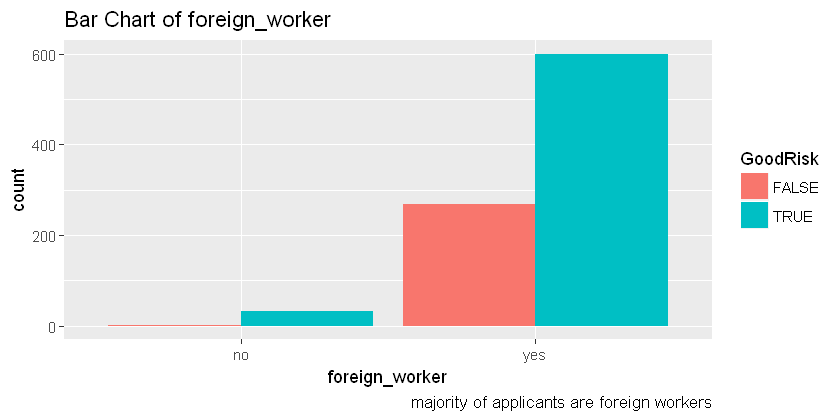

In [29]:
ggplot(train_data) +
    aes(x=foreign_worker, fill=GoodRisk) +
    geom_bar(position = "dodge") +
    labs(title="Bar Chart of foreign_worker",
         caption = "majority of applicants are foreign workers")

#### iv. Text/Non-graphical

In [30]:
Current_balance_table = dplyr::select(train_data, Current_balance, GoodRisk) %>%
                       group_by(Current_balance, GoodRisk) %>%
                       dplyr::summarize(count = n())
Current_balance_spread = spread(Current_balance_table, key=GoodRisk, value=count)      
Current_balance_spread = dplyr::select(Current_balance_spread, 1, deny=2, approve=3) %>%
    mutate(approval_rate=approve/(approve+deny))
Current_balance_spread
print("mean")
mean(Current_balance_spread$approval_rate)

Current_balance,deny,approve,approval_rate
0 <= 200 DM,95,145,0.6041667
0 DM,120,129,0.5180723
200 DM or more,11,46,0.8070175
no checking account,43,311,0.8785311


[1] "mean"


[1] 0.7019469

This shows that people with no checking account have a higher approval rate, and they have a big portion of that category

In [31]:
Credit_history_table = dplyr::select(train_data, Credit_history, GoodRisk) %>%
                       group_by(Credit_history, GoodRisk) %>%
                       dplyr::summarize(count = n())
Credit_history_spread = spread(Credit_history_table, key=GoodRisk, value=count)      
Credit_history_spread = dplyr::select(Credit_history_spread, 1, deny=2, approve=3) %>%
    mutate(approval_rate=approve/(approve+deny))
Credit_history_spread
print("mean")
mean(Credit_history_spread$approval_rate)

Credit_history,deny,approve,approval_rate
all credits at this bank paid back duly,27,18,0.4000000
critical/credits at other banks,44,214,0.8294574
delay in paying off in the past,26,55,0.6790123
existing credits paid back duly till now,151,331,0.6867220
no credits taken/all credits paid back duly,21,13,0.3823529


[1] "mean"


[1] 0.5955089

This shows that if you have critical/credits at other banks you have a pretty high approval rate, compared to existing credits pai back duly till now which has a higher deny rate.

In [32]:
Purpose_table = dplyr::select(train_data, Purpose, GoodRisk) %>%
                       group_by(Purpose, GoodRisk) %>%
                       dplyr::summarize(count = n())
Purpose_spread = spread(Purpose_table, key=GoodRisk, value=count)      
Purpose_spread = dplyr::select(Purpose_spread, 1, deny=2, approve=3) %>%
    mutate(approval_rate=approve/(approve+deny))
Purpose_spread
print("mean")
mean(Credit_history_spread$approval_rate)

Purpose,deny,approve,approval_rate
business,32,52,0.6190476
car(new),79,128,0.6183575
car(used),12,77,0.8651685
domestic appliances,4,8,0.6666667
education,21,25,0.5434783
furniture/equipment,52,112,0.6829268
others,3,7,0.7000000
radio/television,57,203,0.7807692
repairs,8,11,0.5789474
retraining,1,8,0.8888889


[1] "mean"


[1] 0.5955089

A lot of people are getting approved for a new car and decent amount denied out of that. A lot are getting approved for radio/television, on top of that people are wanting approved for furniture/equipment which is interesting.

In [33]:
Personal_status_sex_table = dplyr::select(train_data, Personal_status_sex, GoodRisk) %>%
                       group_by(Personal_status_sex, GoodRisk) %>%
                       dplyr::summarize(count = n())
Personal_status_sex_spread = spread(Personal_status_sex_table, key=GoodRisk, value=count)      
Personal_status_sex_spread = dplyr::select(Personal_status_sex_spread, 1, deny=2, approve=3) %>%
    mutate(approval_rate=approve/(approve+deny))
Personal_status_sex_spread
print("mean")
mean(Personal_status_sex_spread$approval_rate)

Personal_status_sex,deny,approve,approval_rate
female:divorced/separated/married,98,184,0.6524823
male:divorced/separated,19,27,0.5869565
male:married/widowed,21,61,0.7439024
male:single,131,359,0.7326531


[1] "mean"


[1] 0.6789986

This category could have a single female on it, seems to not include women. A big portion says that males are applying and getting approved where women get approved more than divored men but divorced men the number of applicants is lower than the women.

In [34]:
Property_table = dplyr::select(train_data, Property, GoodRisk) %>%
                       group_by(Property, GoodRisk) %>%
                       dplyr::summarize(count = n())
Property_spread = spread(Property_table, key=GoodRisk, value=count)      
Property_spread = dplyr::select(Property_spread, 1, deny=2, approve=3) %>%
    mutate(approval_rate=approve/(approve+deny))
Property_spread
print("mean")
mean(Property_spread$approval_rate)

Property,deny,approve,approval_rate
if not A121 : building society savings agreement/life insurance,62,143,0.6975610
"if not A121/A122 : car or other, not in attribute 6",95,210,0.6885246
real estate,53,201,0.7913386
unknown / no property,59,77,0.5661765


[1] "mean"


[1] 0.6859002

In [35]:
Other_installment_plans_table = dplyr::select(train_data, Other_installment_plans, GoodRisk) %>%
                       group_by(Other_installment_plans, GoodRisk) %>%
                       dplyr::summarize(count = n())
Other_installment_plans_spread = spread(Other_installment_plans_table, key=GoodRisk, value=count)      
Other_installment_plans_spread = dplyr::select(Other_installment_plans_spread, 1, deny=2, approve=3) %>%
    mutate(approval_rate=approve/(approve+deny))
Other_installment_plans_spread
print("mean")
mean(Other_installment_plans_spread$approval_rate)

Other_installment_plans,deny,approve,approval_rate
bank,48,70,0.5932203
none,204,536,0.7243243
stores,17,25,0.5952381


[1] "mean"


[1] 0.6375943

In [36]:
Housing_table = dplyr::select(train_data, Housing, GoodRisk) %>%
                       group_by(Housing, GoodRisk) %>%
                       dplyr::summarize(count = n())
Housing_spread = spread(Housing_table, key=GoodRisk, value=count)      
Housing_spread = dplyr::select(Housing_spread, 1, deny=2, approve=3) %>%
    mutate(approval_rate=approve/(approve+deny))
Housing_spread
print("mean")
mean(Housing_spread$approval_rate)

Housing,deny,approve,approval_rate
free,39,56,0.5894737
own,168,472,0.7375000
rent,62,103,0.6242424


[1] "mean"


[1] 0.6504054

If you own your own home you are more likely to apply and get approved.

In [37]:
foreign_worker_table = dplyr::select(train_data, foreign_worker, GoodRisk) %>%
                       group_by(foreign_worker, GoodRisk) %>%
                       dplyr::summarize(count = n())
foreign_worker_spread = spread(foreign_worker_table, key=GoodRisk, value=count)        
foreign_worker_spread = dplyr::select(foreign_worker_spread , 1, deny=2, approve=3) %>%
    mutate(approval_rate=approve/(approve+deny))
foreign_worker_spread
print("mean")
mean(foreign_worker_spread$approval_rate)

foreign_worker,deny,approve,approval_rate
no,2,31,0.9393939
yes,267,600,0.6920415


[1] "mean"


[1] 0.8157177

A big portion of the people that are applying and getting approved are foreign workers. This makes our data possibly skewed and biast.

## 2. Build a credit model using a logsistic regression

We looked at three models.  For the first model, we ran a logistic regression using all features.  Next we ran a stepAIC to see which features changed our AIC value.  Our second model removed any features the stepAIC function identified.  We made a third model taking out features that made sense from our data exploration.

In [38]:
# all features initially.  Sort of a base model
model01 = glm(GoodRisk ~ Current_balance + Duration_in_month + Credit_history + Purpose +
            Credit_amount + Savings_account_bonds + Present_employment_since +
            income_debt_ratio + Personal_status_sex + Other_debtors + Present_residence_since +
            Property + Age + Other_installment_plans + Housing + Number_credits_at_this_bank +
            Job + Dependents + Telephone + foreign_worker + logit_duration,
            train_data, family=binomial())
summary(model01)


Call:
glm(formula = GoodRisk ~ Current_balance + Duration_in_month + 
    Credit_history + Purpose + Credit_amount + Savings_account_bonds + 
    Present_employment_since + income_debt_ratio + Personal_status_sex + 
    Other_debtors + Present_residence_since + Property + Age + 
    Other_installment_plans + Housing + Number_credits_at_this_bank + 
    Job + Dependents + Telephone + foreign_worker + logit_duration, 
    family = binomial(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4820  -0.7206   0.3799   0.6891   2.3477  

Coefficients:
                                                              Estimate
(Intercept)                                                  3.3888778
Current_balance0 DM                                         -0.3332003
Current_balance200 DM or more                                0.8576183
Current_balanceno checking account                           1.3036959
Duration_in_month                                  

In [39]:
stepwise <- stepAIC(model01, trace=FALSE)
stepwise$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,850,805.0555,905.0555
- Job,3,0.624917659,853,805.6804,899.6804
- Property,3,2.908628386,856,808.5890,896.5890
- Duration_in_month,1,0.001430206,857,808.5905,894.5905
- Present_residence_since,1,0.006224353,858,808.5967,892.5967
- Housing,2,2.393114611,860,810.9898,890.9898
- Number_credits_at_this_bank,1,1.389898992,861,812.3797,890.3797
- Telephone,1,1.354453713,862,813.7342,889.7342
- Dependents,1,1.901370685,863,815.6355,889.6355


In [40]:
# modify model based on stepAIC.
model02 = glm(GoodRisk ~ Current_balance + Credit_history + Purpose +
            Credit_amount + Savings_account_bonds + Present_employment_since +
            income_debt_ratio + Personal_status_sex + Other_debtors +
            Age + Other_installment_plans +
            foreign_worker + logit_duration,
            train_data, family=binomial())
summary(model02)


Call:
glm(formula = GoodRisk ~ Current_balance + Credit_history + Purpose + 
    Credit_amount + Savings_account_bonds + Present_employment_since + 
    income_debt_ratio + Personal_status_sex + Other_debtors + 
    Age + Other_installment_plans + foreign_worker + logit_duration, 
    family = binomial(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4992  -0.7604   0.3934   0.6987   2.3383  

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                                2.619e+00  1.156e+00
Current_balance0 DM                                       -3.929e-01  2.258e-01
Current_balance200 DM or more                              9.030e-01  4.050e-01
Current_balanceno checking account                         1.315e+00  2.397e-01
Credit_historycritical/credits at other banks              1.623e+00  4.311e-01
Credit_historydelay in paying off in the past              1.123

In [41]:
stepwise02 <- stepAIC(model02, trace=FALSE)
stepwise02$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,863,815.6355,889.6355


In [42]:
# features we thought relevant from data exploration
# removed: Age + Dependents + Telephone + Duration_in_month
model03 = glm(GoodRisk ~ Current_balance + Credit_history + Purpose +
            Credit_amount + Savings_account_bonds + Present_employment_since +
            income_debt_ratio + Personal_status_sex + Other_debtors + Present_residence_since +
            Property +  Other_installment_plans + Housing + Number_credits_at_this_bank +
            Job + foreign_worker + logit_duration,
            train_data, family=binomial())
summary(model03)


Call:
glm(formula = GoodRisk ~ Current_balance + Credit_history + Purpose + 
    Credit_amount + Savings_account_bonds + Present_employment_since + 
    income_debt_ratio + Personal_status_sex + Other_debtors + 
    Present_residence_since + Property + Other_installment_plans + 
    Housing + Number_credits_at_this_bank + Job + foreign_worker + 
    logit_duration, family = binomial(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5628  -0.7258   0.3962   0.6957   2.2973  

Coefficients:
                                                              Estimate
(Intercept)                                                  3.773e+00
Current_balance0 DM                                         -3.373e-01
Current_balance200 DM or more                                9.059e-01
Current_balanceno checking account                           1.336e+00
Credit_historycritical/credits at other banks                1.768e+00
Credit_historydelay in paying off in

## 3. Evaluate the accuracy of the credit model

## Evaluate model effectiveness

Once you have 1—3 models that you like, evaluate their effectiveness on the test data you withheld at the beginning of the project.

Report the following:

* An ROC curve. The plotROC package is very useful for drawing these.

* The cost, as defined by the data set provider; a false positive (classifying a bad credit risk as good) has a cost of 5, and a false negative (classifying a good credit risk as bad) has a cost of 1. Plot the cost as a function of the threshold (the threshold on the x axis, and the cost over the test data at that threshold on the y axis).

* The threshold that produces minimal cost.

* For that threshold and 2 others, the precision and recall.

In [43]:
#creates a prediction column for each of out models
test_data_model01 = test_data %>%
    add_predictions(model01)
test_data_model02 = test_data %>%
    add_predictions(model02)
test_data_model03 = test_data %>%
    add_predictions(model03)

In [44]:
#looking at our prediction column
print("model01")
summary(test_data_model01$pred)
print("model02")
summary(test_data_model02$pred)
print("model03")
summary(test_data_model03$pred)

[1] "model01"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.7458  0.1246  0.9767  1.2760  2.5353  4.8571 

[1] "model02"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.1553  0.2251  0.9346  1.2864  2.3678  5.0005 

[1] "model03"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.5398  0.2717  1.0963  1.2920  2.4575  5.1924 

Warning message in verify_d(data$d):
"D not labeled 0/1, assuming FALSE = 0 and TRUE = 1!"

Warning message in verify_d(data$d):
"D not labeled 0/1, assuming FALSE = 0 and TRUE = 1!"

PANEL,group,AUC
1,-1,0.8064516


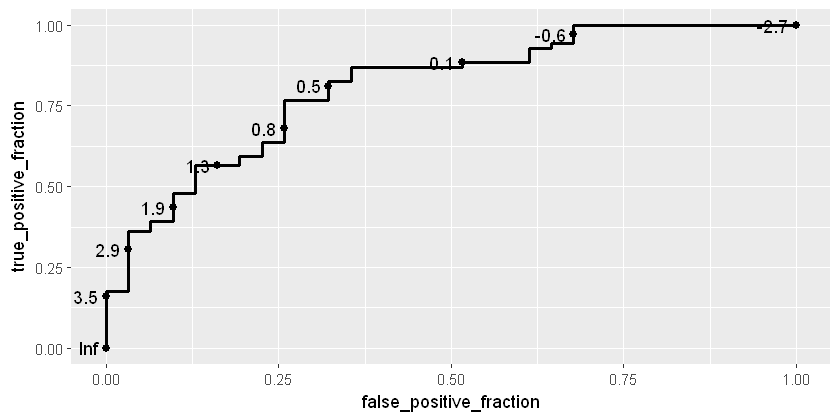

In [45]:
# create roc plots to get AUC
rocplot1 = ggplot(test_data_model01, aes(d = GoodRisk, m = pred)) + 
    geom_roc()
rocplot1
calc_auc(rocplot1) # auc closest to 1 as possible

Warning message in verify_d(data$d):
"D not labeled 0/1, assuming FALSE = 0 and TRUE = 1!"

Warning message in verify_d(data$d):
"D not labeled 0/1, assuming FALSE = 0 and TRUE = 1!"

PANEL,group,AUC
1,-1,0.8027115


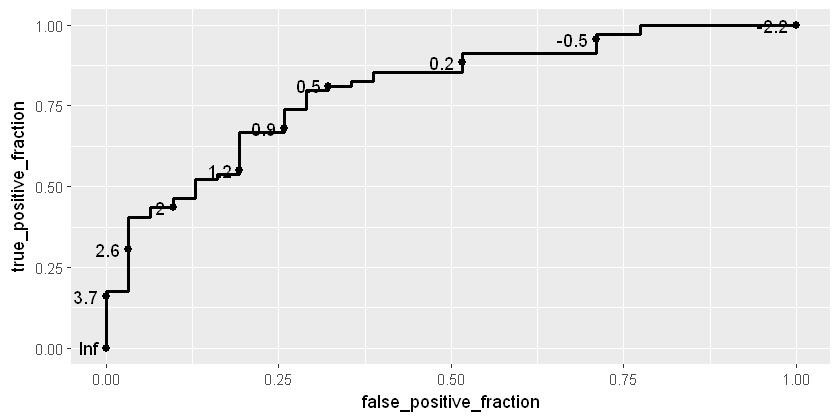

In [46]:
#Roc curve 2
rocplot2 = ggplot(test_data_model02, aes(d = GoodRisk, m = pred)) + 
    geom_roc()
rocplot2
calc_auc(rocplot2)

Warning message in verify_d(data$d):
"D not labeled 0/1, assuming FALSE = 0 and TRUE = 1!"

Warning message in verify_d(data$d):
"D not labeled 0/1, assuming FALSE = 0 and TRUE = 1!"

PANEL,group,AUC
1,-1,0.8167368


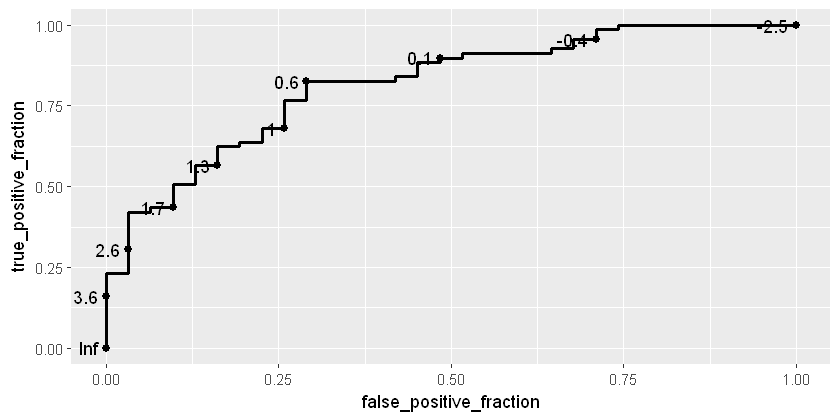

In [47]:
#Roc curve 2
rocplot3 = ggplot(test_data_model03, aes(d = GoodRisk, m = pred)) + 
    geom_roc()
rocplot3
calc_auc(rocplot3)

In [48]:
# transformed prediction column between 0 and 1 to pick a threshhold between 0 and 1
test_data_table1 = test_data_model01 %>% mutate(logit_pred1 = 1/(1+exp(-(test_data_model01$pred))))
test_data_table2 = test_data_model02 %>% mutate(logit_pred2 = 1/(1+exp(-(test_data_model02$pred))))
test_data_table3 = test_data_model03 %>% mutate(logit_pred3 = 1/(1+exp(-(test_data_model03$pred))))

In [49]:
# Calculate recall precision based on threshold that we pick we decided to use our model 3. 
# Created a cost column for model 3


#Assign cost
predictionDecision = test_data_table3$logit_pred3 < .5
#head(predictionDecision)
actualDecision = test_data_table3$GoodRisk

TP = predictionDecision & actualDecision
#summary(TP)
FN = !predictionDecision & actualDecision
#summary(FN)
TN= !predictionDecision & !actualDecision
#summary(TN)
FP = predictionDecision & !actualDecision
#summary(FP)

#create cost column
test_data_table3 = test_data_table3 %>% mutate(cost = 
                    ifelse(predictionDecision & !actualDecision, 5, 
                    ifelse(!predictionDecision & actualDecision,1, 0)))

# test_data_table1

In [50]:

print("sum of cost")
sum(test_data_table3$cost)
print("sum of true outcome")
sum(predictionDecision)

print("precision")
precision = sum(TP)/(sum(TP)+sum(FP))
precision
print("recall")
recall = sum(TP)/(sum(TP)+sum(FN))
recall

[1] "sum of cost"


[1] 138

[1] "sum of true outcome"


[1] 21

[1] "precision"


[1] 0.2857143

[1] "recall"


[1] 0.08695652

In [51]:
# Threshold of .8 using our 3rd mode. Shows our precision and recall.

# Cost, precision, recall from second threshhold
predictionDecision3 = test_data_table3$logit_pred3 < .8
actualDecision3 = test_data_table3$GoodRisk
TP3 = predictionDecision3 & actualDecision3
#summary(TP3)
FN3 = !predictionDecision3 & actualDecision3
#summary(FN3)
TN3 = !predictionDecision3 & !actualDecision3
#summary(TN3)
FP3 = predictionDecision3 & !actualDecision3
#summary(FP3)

print("sum of cost")
sum(test_data_table3$cost)
print("sum of true outcome")
sum(predictionDecision3)

print("precision")
precision3 = sum(TP3)/(sum(TP3)+sum(FP3))
precision3
print("recall")
recall3 = sum(TP3)/(sum(TP3)+sum(FN3))
recall3

[1] "sum of cost"


[1] 138

[1] "sum of true outcome"


[1] 57

[1] "precision"


[1] 0.5263158

[1] "recall"


[1] 0.4347826

In [52]:
# Threshold of .35. Calculates precision and recall

# Cost, precision, recall from third threshhold
predictionDecision2 = test_data_table3$logit_pred3 < .35
actualDecision2 = test_data_table3$GoodRisk

TP2 = predictionDecision2 & actualDecision2
#summary(TP2)
FN2 = !predictionDecision2 & actualDecision2
#summary(FN2)
TN2 = !predictionDecision2 & !actualDecision2
#summary(TN2)
FP2 = predictionDecision2 & !actualDecision2
#summary(FP2)

print("sum of cost")
sum(test_data_table3$cost)
print("sum of true outcome")
sum(predictionDecision2)

print("precision")
precision2 = sum(TP2)/(sum(TP2)+sum(FP2))
precision2
print("recall")
recall2 = sum(TP2)/(sum(TP2)+sum(FN2))
recall2

[1] "sum of cost"


[1] 138

[1] "sum of true outcome"


[1] 9

[1] "precision"


[1] 0.1111111

[1] "recall"


[1] 0.01449275

Precision and recall numbers seem to be all over the place threshold picking a higher threshold seemed to have the best precision recall factor.

## 4. Evaluate whether the credit model results in unwanted discrimination
Discrimination is an important consideration in credit decisions. Many groups have been or still are subject to unjust discrimination; in the U.S., women and racial minorities have historically been denied credit when a others with a similar economic condition would receive credit. Credit scoring can improve this situation, and indeed has improved the ability of racial minorities to obtain credit in the United States. But this is not automatic — we must test our models for discrimination.

For our purposes, we will consider 2 groups of borrowsers as at-risk for discrimination:
* Non-single women (as opposed to men)
* Foreign workers

## Direct Discrimination
<p>
Direct discrimination in the data is present of how the data was collected. Most of the data was foreign workers applying, and when talking about women it did not include single women, it only included women that divorced/married/separated. Our models both included foreign workers and women. When looking if someone gets approved for a loan or not the fact is if they are a foreign worker or a woman it should not matter, what should matter is that you are going to repay the loan. What if we make this decision making automated we do not want want to include these factors in our model. Below is the model without those including sex and foreign worker from the model we decided to go with.
</p>

In [53]:
# removed Personal_status_sex and foreign_worker features
model04 = glm(GoodRisk ~ Current_balance + Credit_history + Purpose +
            Credit_amount + Savings_account_bonds + Present_employment_since +
            income_debt_ratio + Other_debtors + Present_residence_since +
            Property +  Other_installment_plans + Housing + Number_credits_at_this_bank +
            Job + logit_duration,
            train_data, family=binomial())
summary(model04)


Call:
glm(formula = GoodRisk ~ Current_balance + Credit_history + Purpose + 
    Credit_amount + Savings_account_bonds + Present_employment_since + 
    income_debt_ratio + Other_debtors + Present_residence_since + 
    Property + Other_installment_plans + Housing + Number_credits_at_this_bank + 
    Job + logit_duration, family = binomial(), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6922  -0.7713   0.4019   0.7071   2.2958  

Coefficients:
                                                              Estimate
(Intercept)                                                  2.453e+00
Current_balance0 DM                                         -2.535e-01
Current_balance200 DM or more                                9.147e-01
Current_balanceno checking account                           1.393e+00
Credit_historycritical/credits at other banks                1.818e+00
Credit_historydelay in paying off in the past                1.341e+00
Credit_hi

Comparing AIC the model including sex and foreign workers is 905.04 where the AIC of the model not including those attributes is 910.91.

## Indirect Discrimination

The second kind of discrimination is indirect: where the protected characteristic is not directly used, but correlates with other features that are used. In the United States, some forms of indirect discrimination are illegal.

Indirect discrimination can be tricky to detect. One useful step is to look for correlations between the protected characteristic and the features used in your model. <B>Generate plots that show these relationships.</B>

Another useful way to detect indirect discrimination is to generate a second model that attempts to predict the main model’s output using the protected characteristic(s). You can train a logistic regression that predicts the main model’s decisions, or you can train a linear regression that predicts the main model’s scores. If you can effectively predict a significant portion of the main model’s results, that is evidence that the model may be indirectly discriminatory. You can also attempt to predict the main model’s errors using the protected characteristics.

Try all three of these methods.

Does it look like your model is indirectly discriminatory against members of our protected classes? Why or why not?

Does changing the cost weights (from the evaluation section), for example decreasing the cost of a false positive, result in a more or less discriminatory model?

## Summary of Indirect discrimination
To be honest we put a lot of time into this notbook we werent sure how to exactly do the said above to prove indirect discrimnation. We know that this data set is not the best because of how some of it is categorized but we decided to leave most of describing that in the limitations section.



## 5. Reflect on the limitations of the provided data

## Limitations

As we have discussed, our data is always limited, possibly in important ways. Write 2–5 paragraphs about the limitations of the data, supported with plots if you think they would be helpful, and the impact these limitations have on your model and evaluation. Some points to consider:

* Is the ground truth accurate? What does that mean for modeling?

* If the data arises from an historically-discriminatory process, what does that mean for the model? What does that mean for our attempts to measure discrimination?

* What are some limitations of our attempts to detect unjust, illegal, or unwanted discrimination?

## The ground truth
What we are trying to get at in the data is if the characteristics of the applicant if they will repay the loan or not. We can gain inference on the people that are applying and based on the Class (outcome) if they got approved or not. The attributes given seem to relate to the Class attribute but on thing that is missing is if they do get approved did they repay it or not. This could give us better insight of the people that did get approved would they actually repay their loan. 

## Data arising from discriminatory process
Since this data is from Germany it is not like the culture we have in America. Some of the data is out of place, such as including single women catagory in sex. Discrimination in this data is apparent through how it was collected, proving it is another story. Since most of the data collected was saying that foreign workers were the ones applying and a majority of them were getting approved. So what does the data say about the non foreign workers? Since we don't have that much data on the non foreign workers if say we had to make a decision if a non foreign worker applied we might not have enough data on that category to give a good decision if he should get a loan or not.

Also since mostly men are applying for loans be it that they are single, married or divorced, it does not reflect the women that are married to these men. Was the loan approved because the total assets of the marriage was included or was it because the woman/man's credit was better. 

In [54]:
# 1) look for direct discrimination (is it in your model, but has no effect)
# 2) remove direct discrimination
# 3) test for indirect discrimination

In [55]:
# Testing for indirect discrimination:
#    does decision pocess depend on protected charactistic
#    or influenced on protected characteristic
#    data -> model -> decisions
#    
#    predict model output w/protected class

# Signal and the noise: Nate Silver

# direct/indirect discriminaiton: Cynthia Dwork